### Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression

In [24]:
path_ = "c:/Users/Paul/Desktop/MSc DSBA/1. Big Data Analytics/1. Project/Full Data/Cleaned Data/"

### Loading data

In [25]:
df = pd.read_csv(path_+'featured_daily_data.csv')

In [26]:
df.head()

,year,month,day,year.1,index,max_temp,min_temp,wind_speed,wind_temp,rain,...,wkday_cos,sunrise_sin,sunrise_cos,sunset_sin,sunset_cos,mnth_sin,mnth_cos,light,missing_rain,mean_rain
0,2010,9,15,2010,2010-09-15,29.0,17.0,2.222222,17.0,0.000000,...,-0.900969,0.965926,0.258819,-1.0,-1.836970e-16,-0.866025,-0.5,13.0,False,7.666667
1,2010,9,16,2010,2010-09-16,31.0,17.0,4.444444,17.0,1.000000,...,-0.900969,0.965926,0.258819,-1.0,-1.836970e-16,-0.866025,-0.5,13.0,False,7.666667
2,2010,9,17,2010,2010-09-17,25.0,18.0,4.166667,18.0,2.000000,...,-0.222521,0.965926,0.258819,-1.0,-1.836970e-16,-0.866025,-0.5,13.0,False,7.666667
3,2010,9,19,2010,2010-09-19,29.0,16.0,1.388889,16.0,7.666667,...,0.623490,0.965926,0.258819,-1.0,-1.836970e-16,-0.866025,-0.5,13.0,True,7.666667
4,2010,9,20,2010,2010-09-20,25.0,16.0,5.000000,16.0,7.666667,...,1.000000,0.965926,0.258819,-1.0,-1.836970e-16,-0.866025,-0.5,13.0,True,7.666667


### Setting index

In [27]:
df['index'] = pd.to_datetime(df['index'])
df = df.set_index('index', drop = True)

In [28]:
data = df

In [29]:
df_targets = data['cnt']

In [30]:
df = data.drop(['cnt', 'registered', 'casual', 'string_date', 'month','year', 'day'], axis = 1)

In [31]:
mm = MinMaxScaler()
df = mm.fit_transform(df)

pf = PolynomialFeatures(degree = 2, interaction_only=True)
df = pf.fit_transform(df)

print(df.shape)
mm_targets = MinMaxScaler()
df_targets = mm_targets.fit_transform(df_targets.values.astype(float).reshape(-1,1))

(2171, 497)


In [59]:
selecting_features = SelectKBest(f_regression, k=100).fit(df, df_targets.reshape(-1,))
#pca = PCA(n_components=300).fit(df)

C:\Users\Paul\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:279: RuntimeWarning: invalid value encountered in true_divide
  corr /= row_norms(X.T)
C:\Users\Paul\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Paul\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Paul\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [60]:
df_best = selecting_features.transform(df)
#df_best = pca.transform(df)
#df_best = df

In [61]:
k_fold = KFold(n_splits=10)

In [62]:
scores_ridge = []
scores_lasso = []
scores_ridge_train = []
scores_lasso_train = []
scores_rf = []
scores_rf_train = []


for train_index, test_index in k_fold.split(df_best):
    
    X_train = df_best[train_index, :]
    y_train = df_targets[train_index]
    X_test = df_best[test_index, :]
    y_test = df_targets[test_index]
    
    ridge = Ridge()
    lasso = Lasso()
    
    
    ridge.fit(X_train,y_train)
    lasso.fit(X_train, y_train)
    #rf.fit(X_train, y_train)
    
    scores_ridge.append(mean_squared_error(y_test, ridge.predict(X_test)))
    scores_lasso.append(mean_squared_error(y_test, lasso.predict(X_test)))
    #scores_rf.append(mean_squared_error(y_test, rf.predict(X_test)))
    #scores_rf_train.append(mean_squared_error(y_train, rf.predict(X_train)))
    scores_ridge_train.append(mean_squared_error(y_train, ridge.predict(X_train)))
    scores_lasso_train.append(mean_squared_error(y_train, lasso.predict(X_train)))
    
    

### Training models

In [63]:
X_train, X_test, y_train, y_test = train_test_split(df_best, df_targets, test_size = .2)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size = .2)

#### Linear Regression

In [64]:
model = LinearRegression()
model.fit(X_train, y_train)
training_score = mean_squared_error(y_train, model.predict(X_train))
y_pred_cv = model.predict(X_cv)
cross_val_score = mean_squared_error(y_cv, y_pred_cv)
print('Training score {}'.format(training_score))
print('Cross-Validation {}'.format(cross_val_score))

Training score 0.006251815344968952
Cross-Validation 0.007053204545192161


#### Lasso Regularization

In [65]:
model = Lasso()
model.fit(X_train, y_train)
training_score = mean_squared_error(y_train, model.predict(X_train))
y_pred_cv = model.predict(X_cv)
cross_val_score = mean_squared_error(y_cv, y_pred_cv)
print('Training score {}'.format(training_score))
print('Cross-Validation {}'.format(cross_val_score))

Training score 0.04875761093238514
Cross-Validation 0.05069268590590046


#### Ridge Regression

In [66]:
model = Ridge()
model.fit(X_train, y_train)
training_score = mean_squared_error(y_train, model.predict(X_train))
y_pred_cv = model.predict(X_cv)
cross_val_score = mean_squared_error(y_cv, y_pred_cv)
print('Training score {}'.format(training_score))
print('Cross-Validation {}'.format(cross_val_score))

Training score 0.007704844850439765
Cross-Validation 0.00802228077560249


In [67]:
actual_predictions = mm_targets.inverse_transform(y_pred_cv)
actual_values = mm_targets.inverse_transform(y_cv)

## Trafiquons les résultats 
actual_predictions[actual_predictions<np.min(actual_values)] = np.min(actual_values)
actual_predictions[actual_predictions>np.max(actual_values)] = np.max(actual_values)
## Redevenons honnete

actual_error = mean_squared_error(actual_predictions, actual_values)

print("Mean prediction error {}".format(actual_error))

Mean prediction error 1990979.4733211847


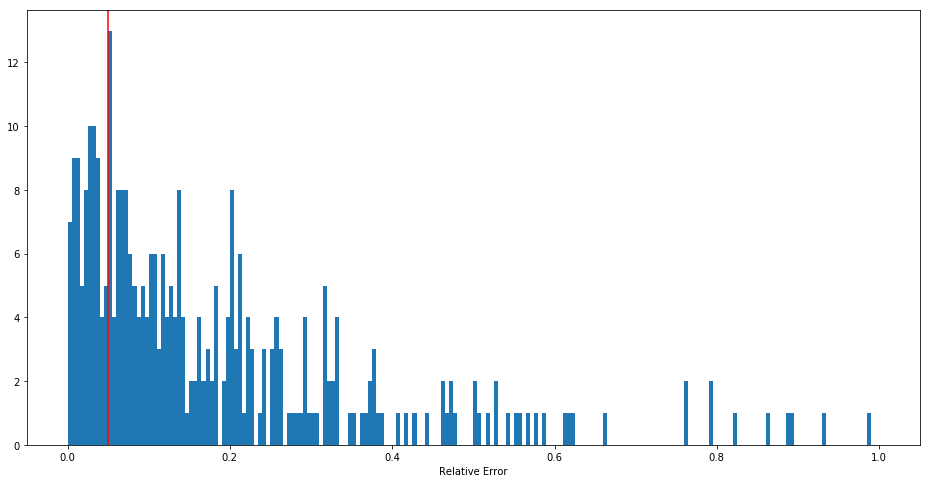

0.315095405845


In [68]:
relative_error = np.abs(np.array(actual_values-actual_predictions)/np.array(actual_values))

plt.figure(figsize = (16,8))
plt.hist(relative_error, bins=200, range=(0, 1))
plt.axvline(.05, color = 'r')
#plt.axvline(-.05, color = 'r')
plt.xlabel("Relative Error")
plt.show()
print(np.mean(relative_error))

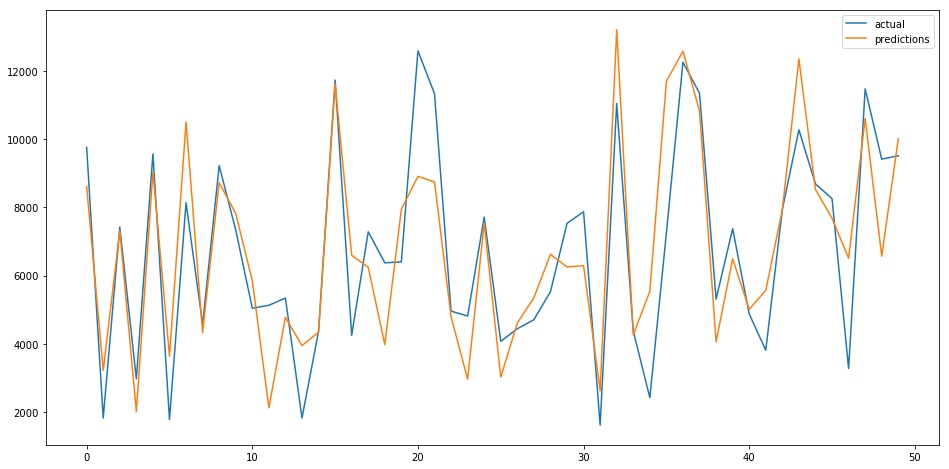

In [69]:
plt.figure(figsize = (16,8))
plt.plot(actual_values[-50:])
plt.plot(actual_predictions[-50:])
plt.legend(['actual', 'predictions'])
plt.show()

### Deep Learning

In [21]:
import tensorflow as tf

In [22]:
import keras.backend as K

Using TensorFlow backend.


In [451]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [579]:
K.clear_session()
model = Sequential()
reduce = ReduceLROnPlateau(monitor='val_loss', factor=.1, patience = 10, verbose = 1)
early = EarlyStopping(monitor='val_loss', patience = 1000, min_delta=0, verbose = 1)

model.add(Dense(10, input_shape = (X_train.shape[1], ), activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1))

model.summary()

model.compile(optimizer = Adam(lr = .0001), loss = 'mse')

_ = model.fit(df_best, df_targets, batch_size=512, epochs=10000, validation_split=.3, verbose = 0, callbacks=[reduce, early])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                2010      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 2,181
Trainable params: 2,181
Non-trainable params: 0
_________________________________________________________________

Epoch 00103: reducing learning rate to 9.999999747378752e-06.

Epoch 00113: reducing learning rate to 9.999999747378752e-07.

Epoch 00123: reducing learning rate to 9.999999974752428e-08.

Epoch 00133: reducing learning rate to 1.0000000116860975e-08.

Epoch 00143: reduc

In [580]:
print(mean_squared_error(model.predict(X_train), y_train))
test_predictions = model.predict(X_train)
actual_predictions = np.floor(mm_targets.inverse_transform(test_predictions))
actual_values = mm_targets.inverse_transform(y_train)

0.0166232174157


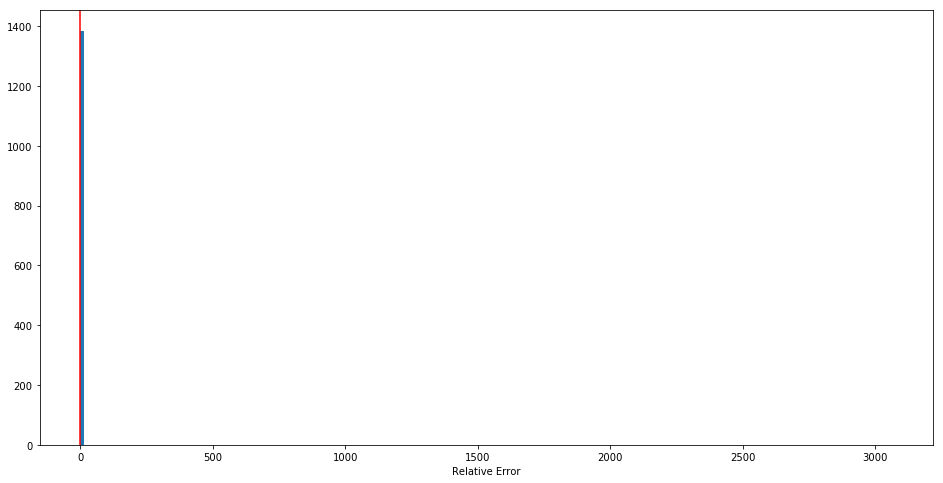

2.89591081083


In [581]:
relative_error = np.abs(np.array(actual_values-actual_predictions)/np.array(actual_values))

plt.figure(figsize = (16,8))
plt.hist(relative_error, bins=200)#, range=(0, 1))
plt.axvline(.05, color = 'r')
#plt.axvline(-.05, color = 'r')
plt.xlabel("Relative Error")
plt.show()
print(np.mean(relative_error))

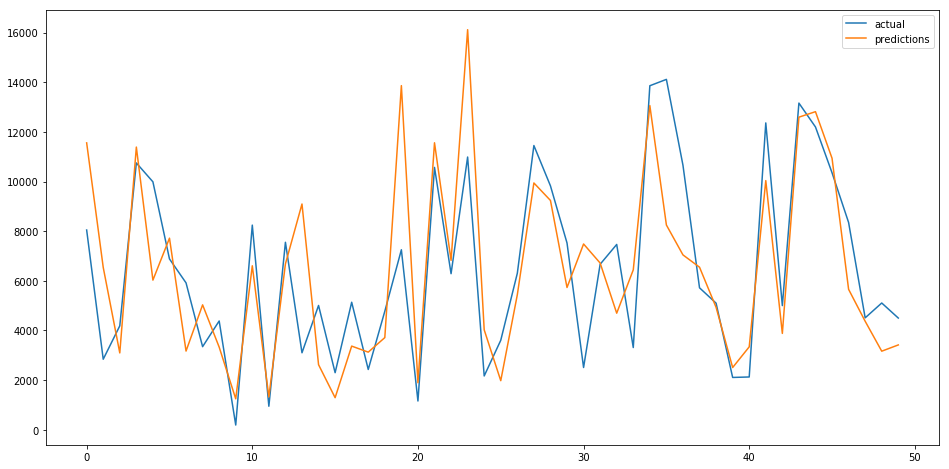

In [582]:
plt.figure(figsize = (16,8))
plt.plot(actual_values[-50:])
plt.plot(actual_predictions[-50:])
plt.legend(['actual', 'predictions'])
plt.show()

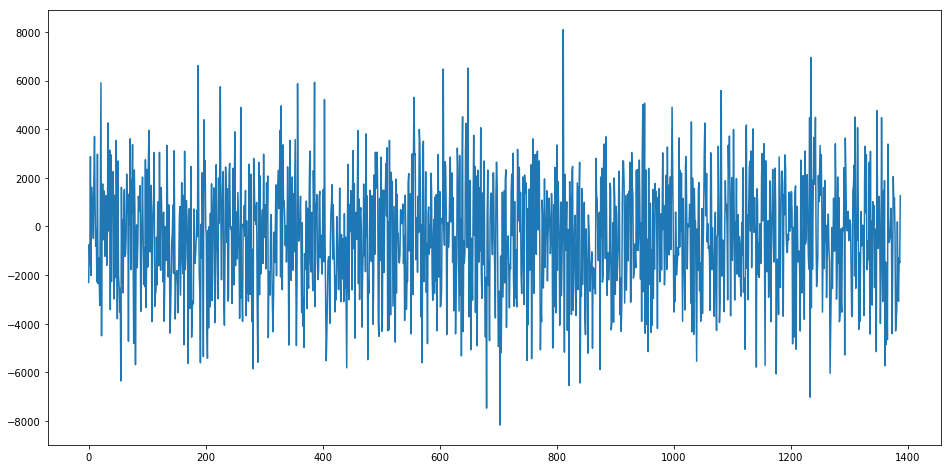

In [456]:
plt.figure(figsize = (16,8))
plt.plot(actual_predictions-actual_values)
plt.show()

In [377]:
np.min(actual_predictions)

1298.0

In [378]:
np.min(actual_values)

9.0

In [379]:
np.max(actual_predictions)

13405.0

In [380]:
np.max(actual_values)

15755.000000000002